In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth, association_rules
import warnings

In [2]:
df=pd.read_csv('clean_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month.astype(int)
df['month'] = df['month'].apply(lambda x: list(calendar.month_abbr)[x])
df

,Age Group,Ethnic Group,ANZSOC Division,Police Area,Police District,Person/Organisation,Victimisations,Date,month
0,Middle-aged-young,Maori,Acts Intended to Cause Injury,Canterbury Metro Area,Canterbury,Person,1,2015-05-01,May
1,Middle-aged-young,Indian,"Robbery, Extortion and Related Offences",Counties Manukau Central Area,Counties/Manukau,Person,1,2015-05-01,May
2,Middle-aged-old,Asian,Acts Intended to Cause Injury,Waitemata West Area,Waitemata,Person,1,2015-05-01,May
3,Middle-aged-young,Indian,"Robbery, Extortion and Related Offences",Counties Manukau West Area,Counties/Manukau,Person,1,2015-05-01,May
4,Middle-aged-old,Indian,"Robbery, Extortion and Related Offences",Counties Manukau Central Area,Counties/Manukau,Person,1,2015-05-01,May
...,...,...,...,...,...,...,...,...,...
706159,Elderly,Maori,Acts Intended to Cause Injury,Waikato West Area,Waikato,Person,1,2023-06-01,Jun
706160,Teenagers,Maori,Acts Intended to Cause Injury,Waitemata West Area,Waitemata,Person,1,2023-06-01,Jun
706161,Middle-aged-young,Maori,Acts Intended to Cause Injury,Waikato East Area,Waikato,Person,1,2023-06-01,Jun
706162,Elderly,Maori,Acts Intended to Cause Injury,Waikato West Area,Waikato,Person,1,2023-06-01,Jun


In [3]:
grouped = df.groupby(['Age Group', 'Ethnic Group', 'ANZSOC Division', 'Police Area', 'Police District', 'Date','month'])['Victimisations'].sum().reset_index()
grouped.sort_values(by='Date', inplace=True)
grouped

,Age Group,Ethnic Group,ANZSOC Division,Police Area,Police District,Date,month,Victimisations
75105,Middle-aged-young,Indian,Theft and Related Offences,Far North Area,Northland,2015-05-01,May,1
90564,Middle-aged-young,Other Ethnicities,Theft and Related Offences,Counties Manukau South Area,Counties/Manukau,2015-05-01,May,2
52809,Middle-aged-young,Asian,Acts Intended to Cause Injury,Hamilton City Area,Waikato,2015-05-01,May,3
3374,Elderly,European,Acts Intended to Cause Injury,Otago Coastal Area,Southern,2015-05-01,May,5
90470,Middle-aged-young,Other Ethnicities,Theft and Related Offences,Counties Manukau East Area,Counties/Manukau,2015-05-01,May,4
...,...,...,...,...,...,...,...,...
67969,Middle-aged-young,European,Theft and Related Offences,Marlborough Area,Tasman,2023-06-01,Jun,4
50476,Middle-aged-old,Pacific Island,Theft and Related Offences,Canterbury Metro Area,Canterbury,2023-06-01,Jun,1
16891,Elderly,Pacific Island,Acts Intended to Cause Injury,Hawkes Bay Area,Eastern,2023-06-01,Jun,1
16921,Elderly,Pacific Island,Acts Intended to Cause Injury,Hutt Valley Area,Wellington,2023-06-01,Jun,1


In [4]:
lst = []
for i in range(len(df)):
    lst.append(list(df.iloc[i,[0,1,2,3,8]]))

lst[:5]

[['Middle-aged-young',
  'Maori',
  'Acts Intended to Cause Injury',
  'Canterbury Metro Area',
  'May'],
 ['Middle-aged-young',
  'Indian',
  'Robbery, Extortion and Related Offences',
  'Counties Manukau Central Area',
  'May'],
 ['Middle-aged-old',
  'Asian',
  'Acts Intended to Cause Injury',
  'Waitemata West Area',
  'May'],
 ['Middle-aged-young',
  'Indian',
  'Robbery, Extortion and Related Offences',
  'Counties Manukau West Area',
  'May'],
 ['Middle-aged-old',
  'Indian',
  'Robbery, Extortion and Related Offences',
  'Counties Manukau Central Area',
  'May']]

In [5]:
te = TransactionEncoder()
te_ary = te.fit(lst).transform(lst)
new_df = pd.DataFrame(te_ary, columns=te.columns_)
new_df

,"Abduction, Harassment and Other Related Offences Against a Person",Acts Intended to Cause Injury,Apr,Asian,Auckland Central Area,Auckland East Area,Auckland Motorways Area,Auckland West Area,Aug,Canterbury Metro Area,...,Waikato West Area,Wairarapa Area,Waitemata East Area,Waitemata North Area,Waitemata West Area,Wellington Area,West Coast Area,Western Bay Of Plenty Area,Whanganui Area,Whangarei Area
0,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706159,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
706160,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
706161,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
706162,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


# apriori

In [6]:
apri = apriori(new_df, min_support=0.025, use_colnames=True)
apri

,support,itemsets
0,0.447539,(Acts Intended to Cause Injury)
1,0.074408,(Apr)
2,0.052380,(Asian)
3,0.036962,(Auckland Central Area)
4,0.035005,(Auckland East Area)
...,...,...
140,0.090034,"(European, Middle-aged-old, Theft and Related ..."
141,0.094960,"(European, Theft and Related Offences, Middle-..."
142,0.027699,"(Indian, Theft and Related Offences, Middle-ag..."
143,0.035849,"(Theft and Related Offences, Middle-aged-old, ..."


In [9]:
rules = association_rules(apri, metric="lift", min_threshold=1)
rules = rules[(rules['confidence'] > 0.5)&(rules['antecedents'].apply(lambda x:len(x)>=2))]
rules.sort_values(by='confidence', inplace=True,ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
123,"(European, Elderly)",(Theft and Related Offences),0.064682,0.477167,0.047068,0.727691,1.525024,0.016204,1.919998,0.368081
124,"(Theft and Related Offences, Elderly)",(European),0.066063,0.474963,0.047068,0.712482,1.500078,0.015691,1.826101,0.356949
116,"(Teenagers, Maori)",(Acts Intended to Cause Injury),0.056963,0.447539,0.040299,0.707470,1.580802,0.014806,1.888565,0.389602
136,"(Indian, Theft and Related Offences)",(Middle-aged-young),0.041492,0.472155,0.027699,0.667577,1.413893,0.008108,1.587870,0.305405
110,"(Middle-aged-young, Maori)",(Acts Intended to Cause Injury),0.148036,0.447539,0.089383,0.603790,1.349134,0.023131,1.394364,0.303750
137,"(Indian, Middle-aged-young)",(Theft and Related Offences),0.046632,0.477167,0.027699,0.593987,1.244821,0.005448,1.287726,0.206292
128,"(European, Middle-aged-old)",(Theft and Related Offences),0.155144,0.477167,0.090034,0.580328,1.216195,0.016005,1.245814,0.210407
130,"(Theft and Related Offences, Middle-aged-old)",(European),0.163243,0.474963,0.090034,0.551537,1.161221,0.012500,1.170747,0.165923
102,"(European, Teenagers)",(Acts Intended to Cause Injury),0.060705,0.447539,0.032240,0.531095,1.186702,0.005072,1.178195,0.167496
111,"(Maori, Acts Intended to Cause Injury)",(Middle-aged-young),0.174666,0.472155,0.089383,0.511736,1.083829,0.006913,1.081063,0.093714


# FP-growth

In [29]:
fp_growth = fpgrowth(new_df, min_support=0.025, use_colnames=True)
fp_growth

,support,itemsets
0,0.472155,(Middle-aged-young)
1,0.447539,(Acts Intended to Cause Injury)
2,0.299345,(Maori)
3,0.090851,(May)
4,0.063480,(Canterbury Metro Area)
...,...,...
140,0.039201,"(Mar, Middle-aged-young)"
141,0.035714,"(Middle-aged-young, Apr)"
142,0.035680,"(European, Apr)"
143,0.035659,"(Theft and Related Offences, Apr)"


In [90]:
fp_rules = association_rules(fp_growth, metric="lift", min_threshold=1)
fp_ruless = fp_rules[(fp_rules['confidence'] > 0.5)&(fp_rules['antecedents'].apply(lambda x:len(x)>=2))]
fp_ruless = fp_ruless.copy()
fp_ruless.sort_values(by='confidence', inplace=True,ascending=False)
fp_ruless

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
65,"(European, Elderly)",(Theft and Related Offences),0.064682,0.477167,0.047068,0.727691,1.525024,0.016204,1.919998,0.368081
66,"(Theft and Related Offences, Elderly)",(European),0.066063,0.474963,0.047068,0.712482,1.500078,0.015691,1.826101,0.356949
74,"(Teenagers, Maori)",(Acts Intended to Cause Injury),0.056963,0.447539,0.040299,0.707470,1.580802,0.014806,1.888565,0.389602
26,"(Indian, Theft and Related Offences)",(Middle-aged-young),0.041492,0.472155,0.027699,0.667577,1.413893,0.008108,1.587870,0.305405
8,"(Middle-aged-young, Maori)",(Acts Intended to Cause Injury),0.148036,0.447539,0.089383,0.603790,1.349134,0.023131,1.394364,0.303750
27,"(Indian, Middle-aged-young)",(Theft and Related Offences),0.046632,0.477167,0.027699,0.593987,1.244821,0.005448,1.287726,0.206292
46,"(European, Middle-aged-old)",(Theft and Related Offences),0.155144,0.477167,0.090034,0.580328,1.216195,0.016005,1.245814,0.210407
48,"(Theft and Related Offences, Middle-aged-old)",(European),0.163243,0.474963,0.090034,0.551537,1.161221,0.012500,1.170747,0.165923
80,"(European, Teenagers)",(Acts Intended to Cause Injury),0.060705,0.447539,0.032240,0.531095,1.186702,0.005072,1.178195,0.167496
9,"(Maori, Acts Intended to Cause Injury)",(Middle-aged-young),0.174666,0.472155,0.089383,0.511736,1.083829,0.006913,1.081063,0.093714


In [89]:
warnings.filterwarnings("ignore", category=FutureWarning)

tempt_lst = []
for i in range(len(fp_ruless)):
    tempt_lst.append(list(fp_ruless.iloc[i,0])+list(fp_ruless.iloc[i,1]))
    
unique_list = list(set(tuple(sorted(sublist)) for sublist in tempt_lst))
unique_list = [list(sublist) for sublist in unique_list]

for i in unique_list:
    final_dic = {}
    temp_lst = []
    for j in i: 
        for col in df.columns:
            if j in df[col].values:
                final_dic[col] = j
    temp_lst.append(final_dic)
    for h in temp_lst:
        print(f'When "{list(h.keys())[0]}" is "{list(h.values())[0]}" and "{list(h.keys())[1]}" is "{list(h.values())[1]}" then "{list(h.keys())[2]}" is likely to be "{list(h.values())[2]}"')
    print()
        

When "ANZSOC Division" is "Acts Intended to Cause Injury" and "Ethnic Group" is "Maori" then "Age Group" is likely to be "Middle-aged-young"

When "Ethnic Group" is "European" and "Age Group" is "Middle-aged-old" then "ANZSOC Division" is likely to be "Theft and Related Offences"

When "ANZSOC Division" is "Acts Intended to Cause Injury" and "Ethnic Group" is "European" then "Age Group" is likely to be "Teenagers"

When "ANZSOC Division" is "Acts Intended to Cause Injury" and "Ethnic Group" is "Maori" then "Age Group" is likely to be "Teenagers"

When "Ethnic Group" is "Indian" and "Age Group" is "Middle-aged-young" then "ANZSOC Division" is likely to be "Theft and Related Offences"

When "ANZSOC Division" is "Acts Intended to Cause Injury" and "Ethnic Group" is "European" then "Age Group" is likely to be "Middle-aged-old"

When "ANZSOC Division" is "Acts Intended to Cause Injury" and "Ethnic Group" is "Maori" then "Age Group" is likely to be "Middle-aged-old"

When "Age Group" is "Eld

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


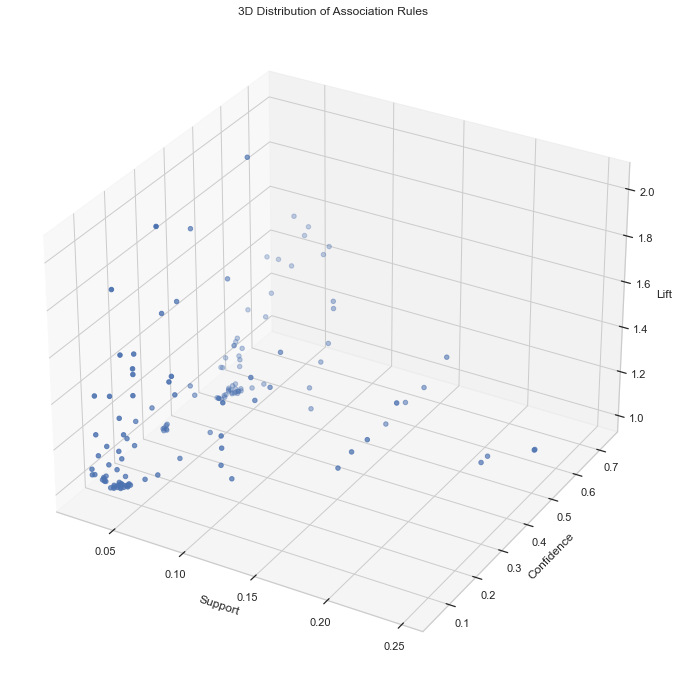

In [157]:
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = fp_rules['support']
y = fp_rules['confidence']
z = fp_rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

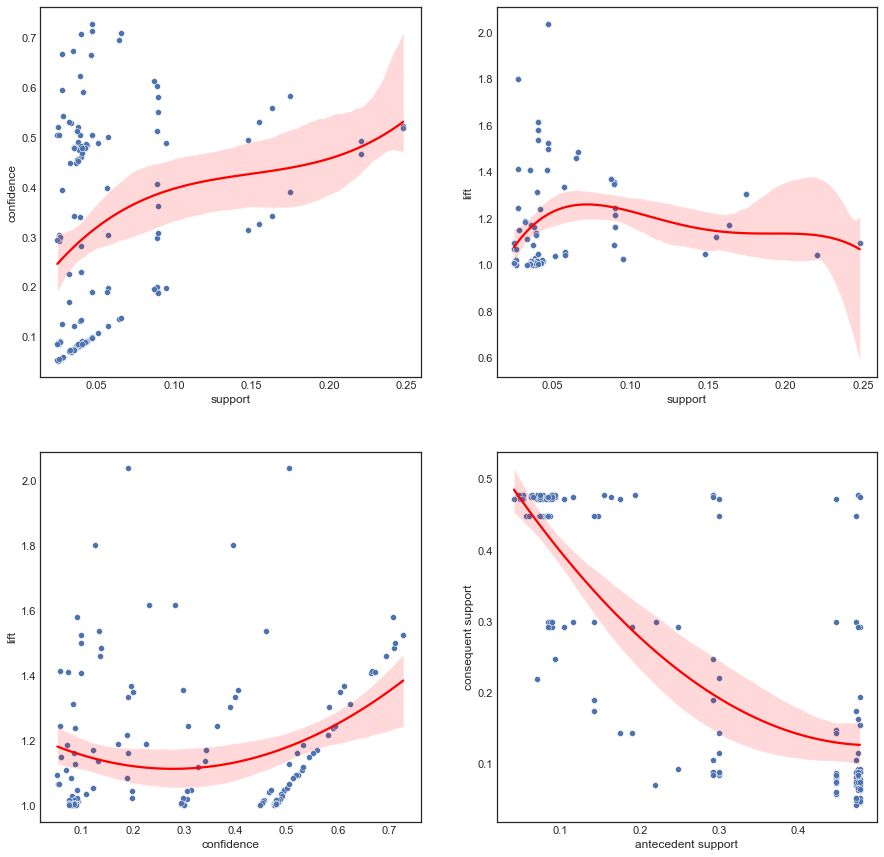

In [154]:
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=fp_rules)
sns.regplot(data=fp_rules, x='support', y='confidence', scatter=False, color='red',order=3)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=fp_rules)
sns.regplot(data=fp_rules, x='support', y='lift', scatter=False, color='red',order=3)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=fp_rules)
sns.regplot(data=fp_rules, x='confidence', y='lift', scatter=False, color='red',order=2)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=fp_rules)
sns.regplot(data=fp_rules, x='antecedent support', y='consequent support', scatter=False, color='red',order=2)

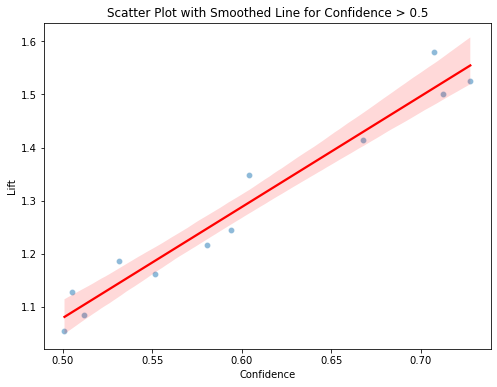

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=fp_ruless, x='confidence', y='lift', alpha=0.5)
sns.regplot(data=fp_ruless, x='confidence', y='lift', scatter=False, color='red')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Scatter Plot with Smoothed Line for Confidence > 0.5')
plt.show()

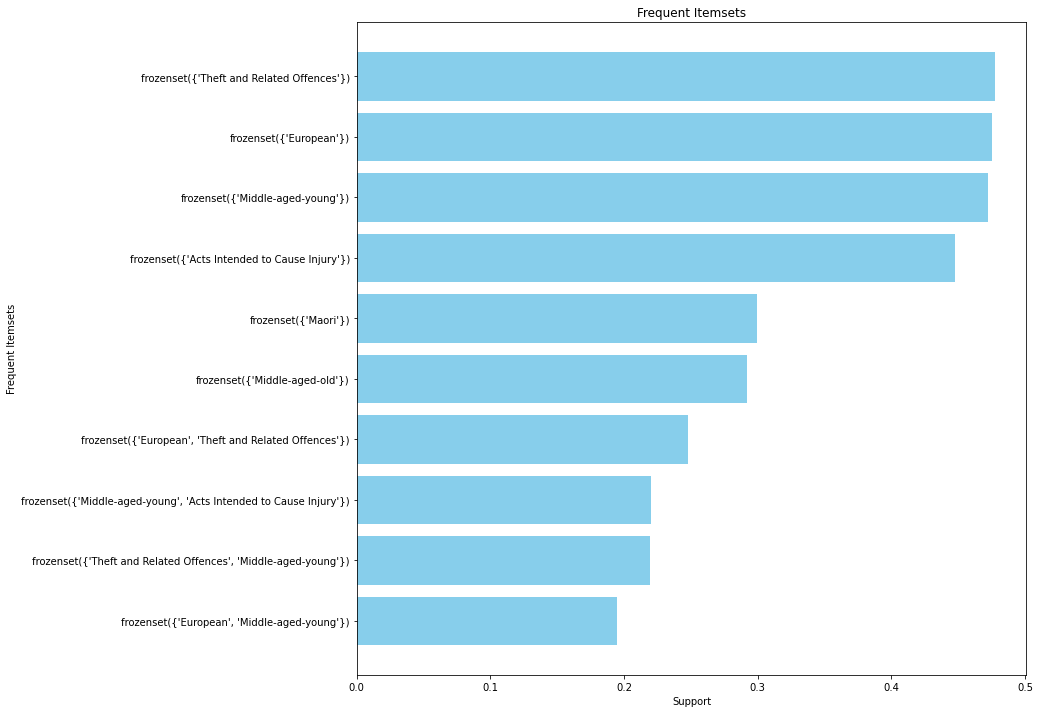

In [100]:
sorted_df = fp_growth.sort_values(by='support')
top_10 = sorted_df.tail(10)
plt.figure(figsize=(12,12))
plt.barh(top_10['itemsets'].astype(str), top_10['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Frequent Itemsets')
plt.title('Frequent Itemsets')
plt.show()

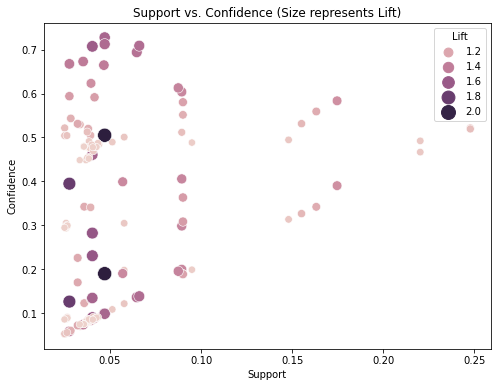

In [108]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=fp_rules, x='support', y='confidence', hue='lift', size='lift', sizes=(50, 200))
plt.title('Support vs. Confidence (Size represents Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.show()

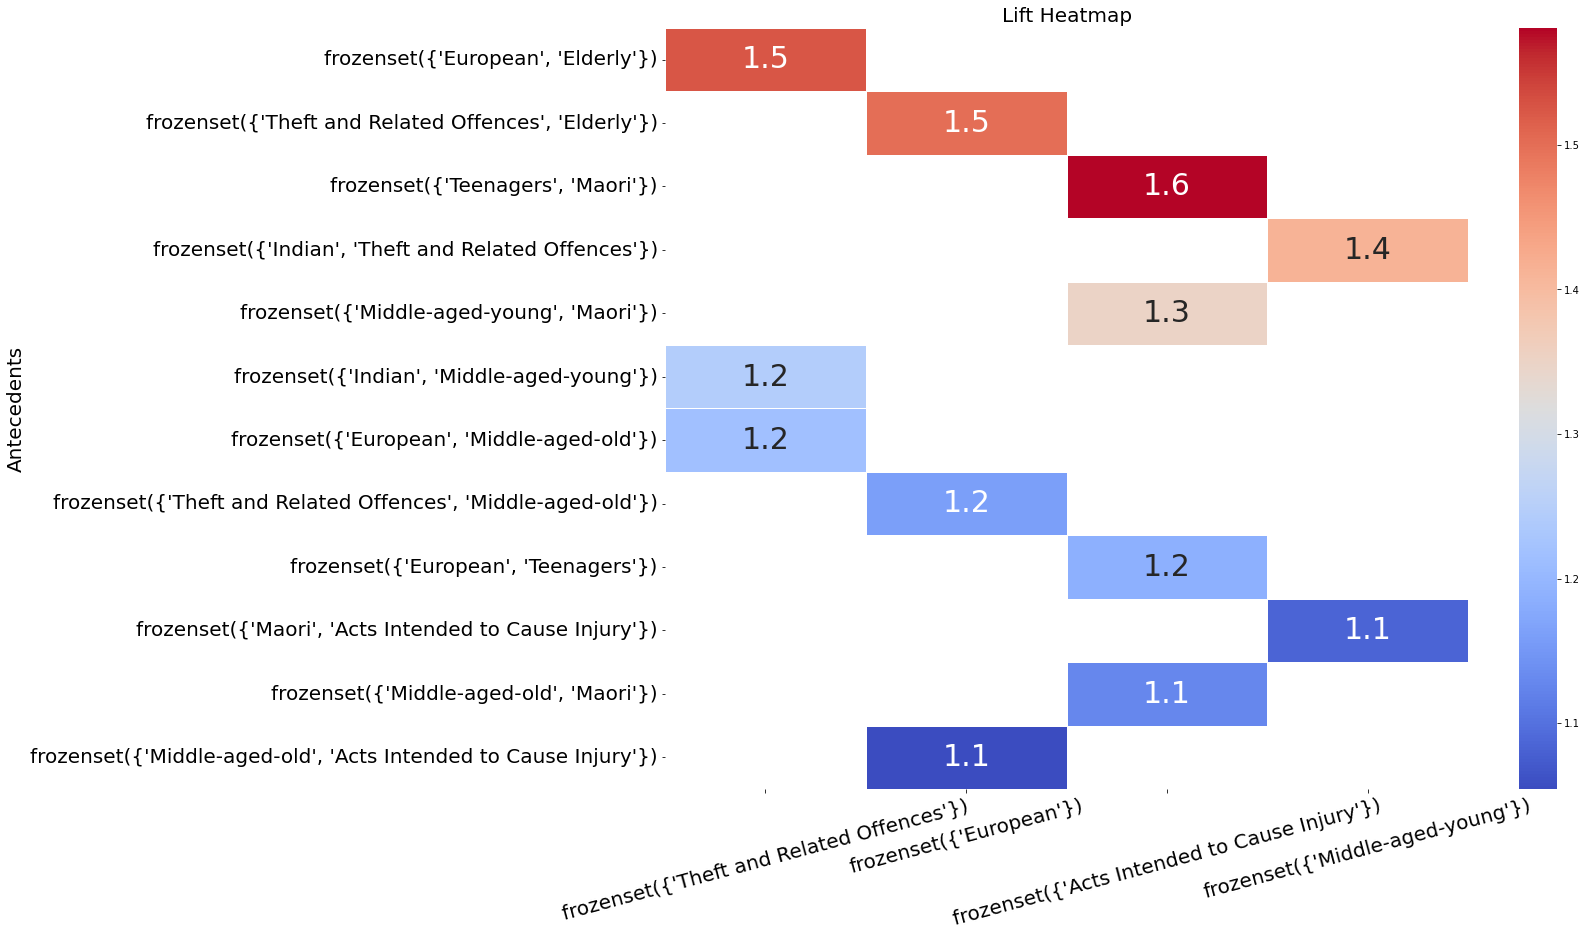

In [137]:
pivot_table = fp_ruless.pivot(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(18, 14))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5,annot_kws={"size": 30})
plt.title('Lift Heatmap', fontsize=20)  # Adjust the title font size
plt.xlabel('', fontsize=20)  # Adjust x-axis label font size
plt.ylabel('Antecedents', fontsize=20)
plt.xticks(fontsize=20,rotation=15)  # Adjust x-axis tick label font size if needed
plt.yticks(fontsize=20)
plt.show()